In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.shape

(8124, 23)

In [4]:
X = df.drop("class", axis = 1)
y = df["class"]

X_encoded = pd.get_dummies(X, prefix_sep = "_")
y_encoded = LabelEncoder().fit_transform(y)
X_encoded["Class"] = y_encoded

X_encoded.corr()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,Class
cap-shape_b,1.000000,-0.005387,-0.193260,-0.081769,-0.015264,-0.219564,-0.091638,0.018820,0.117712,-0.027947,...,-0.168381,-0.120154,-0.182037,0.149151,0.010113,0.374316,-0.095178,-0.052871,-0.037764,-0.182567
cap-shape_c,-0.005387,1.000000,-0.017672,-0.007477,-0.001396,-0.020077,-0.014032,0.249631,-0.015038,0.015893,...,-0.022075,-0.011469,-0.017653,-0.013306,0.065707,-0.004286,-0.008985,-0.004835,-0.003453,0.023007
cap-shape_f,-0.193260,-0.017672,1.000000,-0.268226,-0.050070,-0.720235,0.064801,-0.006285,-0.093397,0.029076,...,0.034625,0.111346,0.074986,-0.017982,-0.052326,-0.129312,0.021891,0.030636,-0.017450,0.018526
cap-shape_k,-0.081769,-0.007477,-0.268226,1.000000,-0.021185,-0.304733,-0.158942,0.010863,0.137988,0.015261,...,0.172707,-0.170081,-0.089230,-0.113404,0.235108,-0.065047,0.090538,-0.073380,0.119003,0.163565
cap-shape_s,-0.015264,-0.001396,-0.050070,-0.021185,1.000000,-0.056884,0.099464,-0.001396,-0.042607,-0.051272,...,0.000341,0.044603,-0.050018,-0.037702,-0.021242,-0.012142,-0.025458,0.288697,-0.009784,-0.060664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
habitat_m,0.374316,-0.004286,-0.129312,-0.065047,-0.012142,-0.004529,-0.122077,-0.004286,0.077081,0.039697,...,-0.144434,-0.099772,-0.153579,-0.115762,-0.065222,1.000000,-0.078170,-0.042059,-0.030041,-0.138627
habitat_p,-0.095178,-0.008985,0.021891,0.090538,-0.025458,-0.029042,-0.086727,-0.008985,-0.039574,0.117915,...,0.169228,0.040714,-0.322005,-0.242715,-0.136749,-0.078170,1.000000,-0.088184,-0.062986,0.323346
habitat_u,-0.052871,-0.004835,0.030636,-0.073380,0.288697,0.002845,-0.011913,-0.004835,0.117548,-0.100248,...,0.001180,-0.042888,-0.173254,-0.130592,-0.073577,-0.042059,-0.088184,1.000000,-0.033889,0.112078
habitat_w,-0.037764,-0.003453,-0.017450,0.119003,-0.009784,-0.036493,-0.098365,-0.003453,0.062109,0.031986,...,-0.154742,-0.080392,-0.123748,-0.093276,-0.052553,-0.030041,-0.062986,-0.033889,1.000000,-0.150087


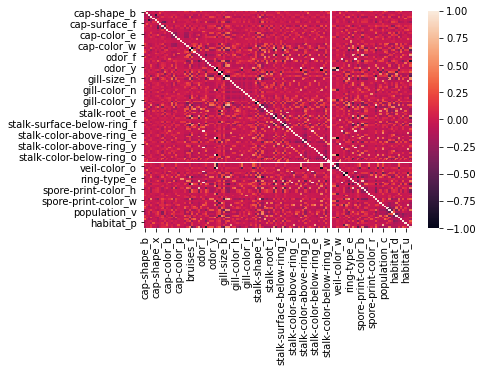

In [5]:
sns.heatmap(X_encoded.corr());

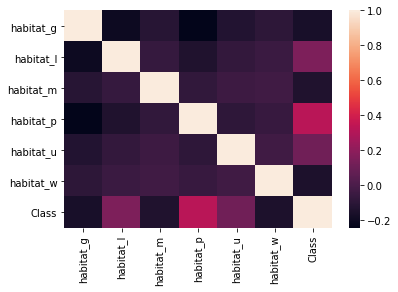

In [6]:
# Son 7 değişkenin korelasyonu:

sns.heatmap(X_encoded.iloc[:,-7:].corr());

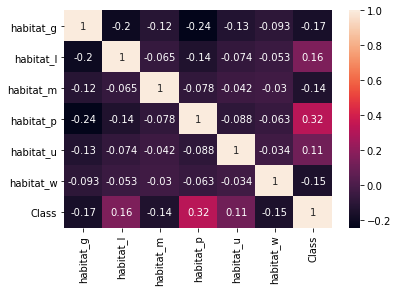

In [7]:
sns.heatmap(X_encoded.iloc[:,-7:].corr(), annot = True);

In [8]:
X_encoded.iloc[:,-7:].corr().abs() # mutlak değerlerle alıyoruz

,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,Class
habitat_g,1.000000,0.202512,0.115762,0.242715,0.130592,0.093276,0.165004
habitat_l,0.202512,1.000000,0.065222,0.136749,0.073577,0.052553,0.155150
habitat_m,0.115762,0.065222,1.000000,0.078170,0.042059,0.030041,0.138627
habitat_p,0.242715,0.136749,0.078170,1.000000,0.088184,0.062986,0.323346
habitat_u,0.130592,0.073577,0.042059,0.088184,1.000000,0.033889,0.112078
habitat_w,0.093276,0.052553,0.030041,0.062986,0.033889,1.000000,0.150087
Class,0.165004,0.155150,0.138627,0.323346,0.112078,0.150087,1.000000


In [9]:
# En yüksek 15 değer:

X_encoded.corr()["Class"].abs().nlargest(15)

Class                         1.000000
odor_n                        0.785557
odor_f                        0.623842
stalk-surface-above-ring_k    0.587658
stalk-surface-below-ring_k    0.573524
ring-type_p                   0.540469
gill-size_n                   0.540024
gill-size_b                   0.540024
gill-color_b                  0.538808
bruises_f                     0.501530
bruises_t                     0.501530
stalk-surface-above-ring_s    0.491314
spore-print-color_h           0.490229
ring-type_l                   0.451619
population_v                  0.443722
Name: Class, dtype: float64

In [10]:
X_encoded.corr()["Class"].abs().nlargest(10).index

Index(['Class', 'odor_n', 'odor_f', 'stalk-surface-above-ring_k',
       'stalk-surface-below-ring_k', 'ring-type_p', 'gill-size_n',
       'gill-size_b', 'gill-color_b', 'bruises_f'],
      dtype='object')

In [11]:
X_highest_cor = X_encoded.corr()["Class"].abs().nlargest(10).index
X_encoded[X_highest_cor]

,Class,odor_n,odor_f,stalk-surface-above-ring_k,stalk-surface-below-ring_k,ring-type_p,gill-size_n,gill-size_b,gill-color_b,bruises_f
0,1,0,0,0,0,1,1,0,0,0
1,0,0,0,0,0,1,0,1,0,0
2,0,0,0,0,0,1,0,1,0,0
3,1,0,0,0,0,1,1,0,0,0
4,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
8119,0,1,0,0,0,1,0,1,0,1
8120,0,1,0,0,0,1,0,1,0,1
8121,0,1,0,0,0,1,0,1,0,1
8122,1,0,0,0,1,0,1,0,1,1


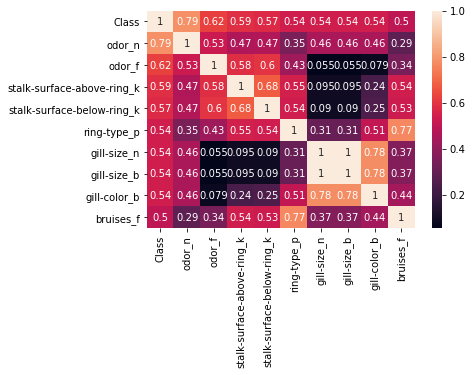

In [12]:
sns.heatmap(X_encoded[X_highest_cor].corr().abs(), annot = True);

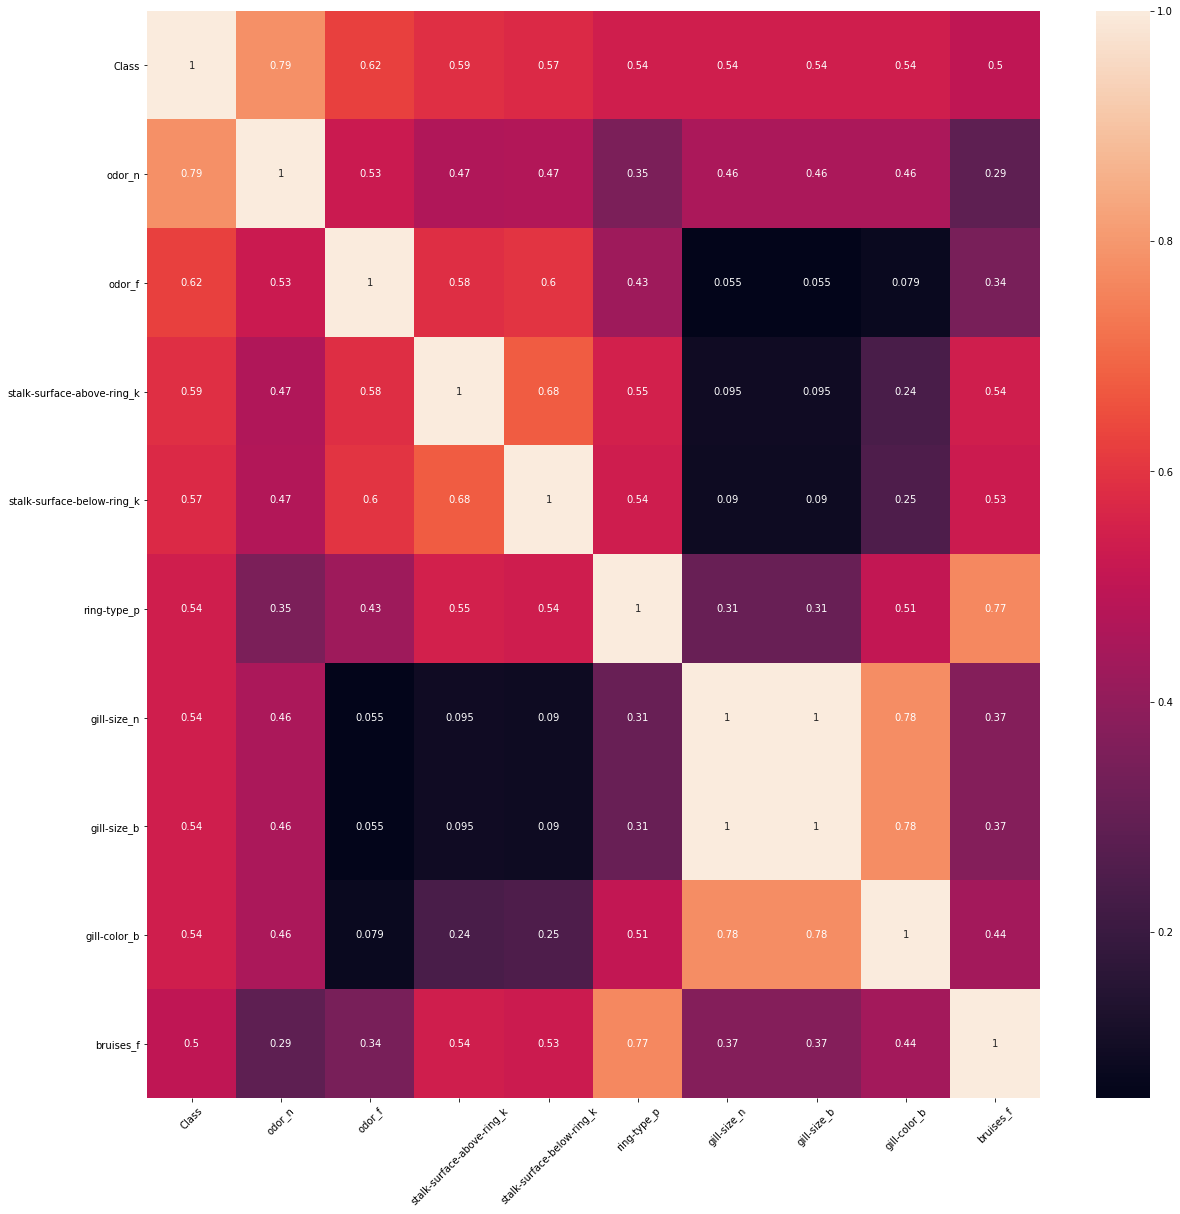

In [13]:
plt.figure(figsize = (20,20))
sns.heatmap(X_encoded[X_highest_cor].corr().abs(), annot = True)
plt.xticks(rotation = 45);

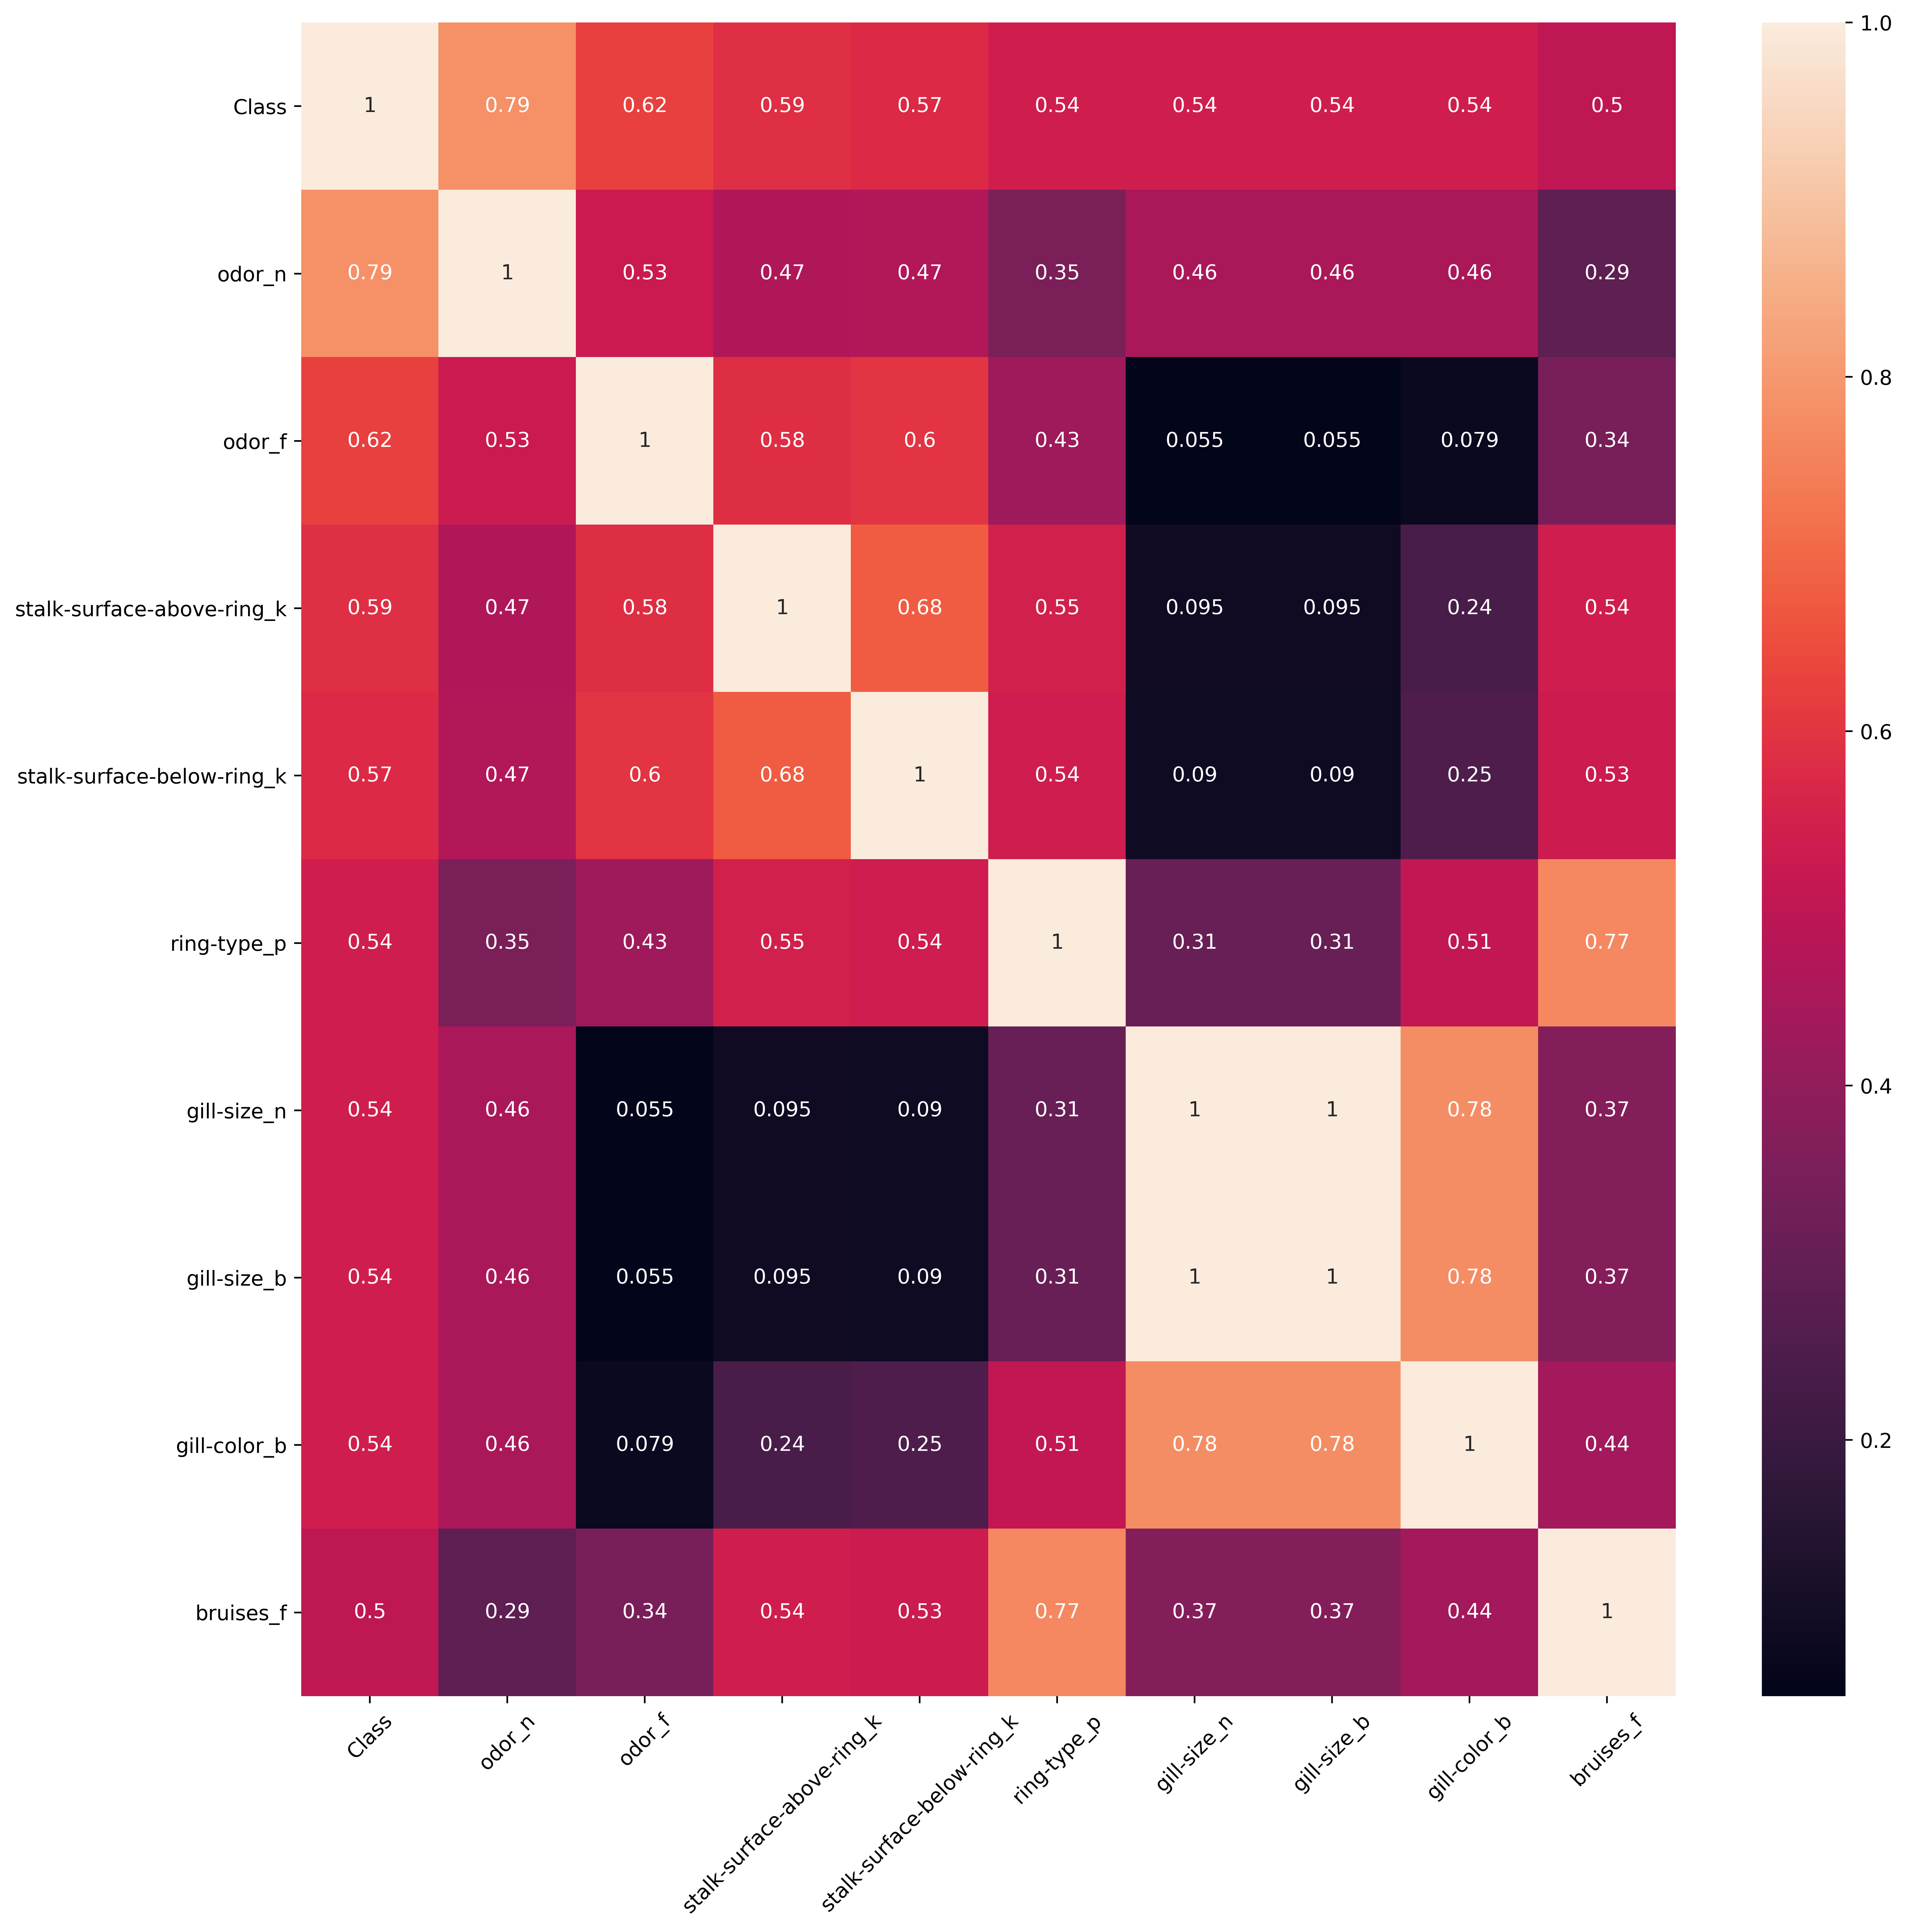

In [14]:
plt.figure(figsize = (15,15), dpi = 500) # dpi : daha net görünmesi için
sns.heatmap(X_encoded[X_highest_cor].corr().abs(), annot = True)
plt.xticks(rotation = 45);